In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid, tanh

import sklearn
import sklearn.datasets


In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    #X = X.T
    #Y = Y.T

    return X, Y

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure


# Ejemplo 1

In [3]:
x, y = load_planar_dataset()
# Dimensiones de los conjuntos
print ("x shape: " + str(x.shape))
print ("y shape: " + str(y.shape))

x shape: (400, 2)
y shape: (400, 1)


In [4]:
print('Cantidad de ejemplos de clase 0:', np.sum(y==0))
print('Cantidad de ejemplos de clase 1:', np.sum(y==1))

Cantidad de ejemplos de clase 0: 200
Cantidad de ejemplos de clase 1: 200


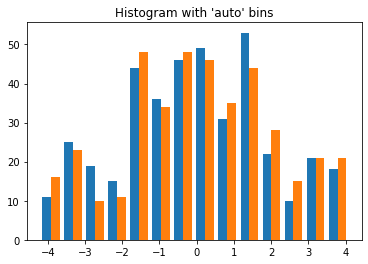

In [5]:
import matplotlib.pyplot as plt
_ = plt.hist(x, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

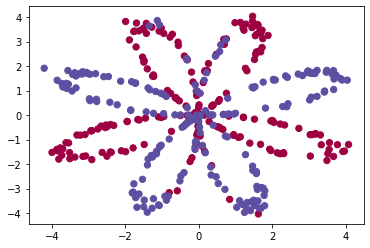

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral);

In [20]:
x.shape[-1]

2

In [7]:
# Creación del modelo
model = Sequential([
                    Dense(units=1, input_shape= [x.shape[-1]], activation=tanh),
                    Dense(units=1, activation=sigmoid)
                    ])

In [8]:
# Arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss= tf.keras.losses.BinaryCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy() )


In [10]:
model.fit(x, y, epochs=1000, batch_size=400)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.8486 - binary_accuracy: 0.5025
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.8068 - binary_accuracy: 0.5175
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7611 - binary_accuracy: 0.5275
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7191 - binary_accuracy: 0.5575
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6901 - binary_accuracy: 0.6075
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6757 - binary_accuracy: 0.6450
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6721 - binary_accuracy: 0.6525
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6742 - binary_accuracy: 0.6350
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6772 - binary_accuracy: 0.6125
Epoch 10/1000
1/1 [==============================] - 0s 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


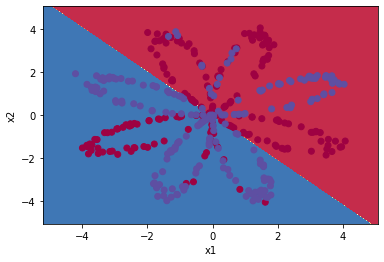

In [11]:
plot_decision_boundary(lambda x: model.predict_classes(x), x.T, y.T)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy for 1 hidden units: 62.0 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 67.25 %
Accuracy for 4 hidden units: 91.5 %
Accuracy for 5 hidden units: 91.5 %
Accuracy for 20 hidden units: 95.25 %
Accuracy for 50 hidden units: 96.75 %


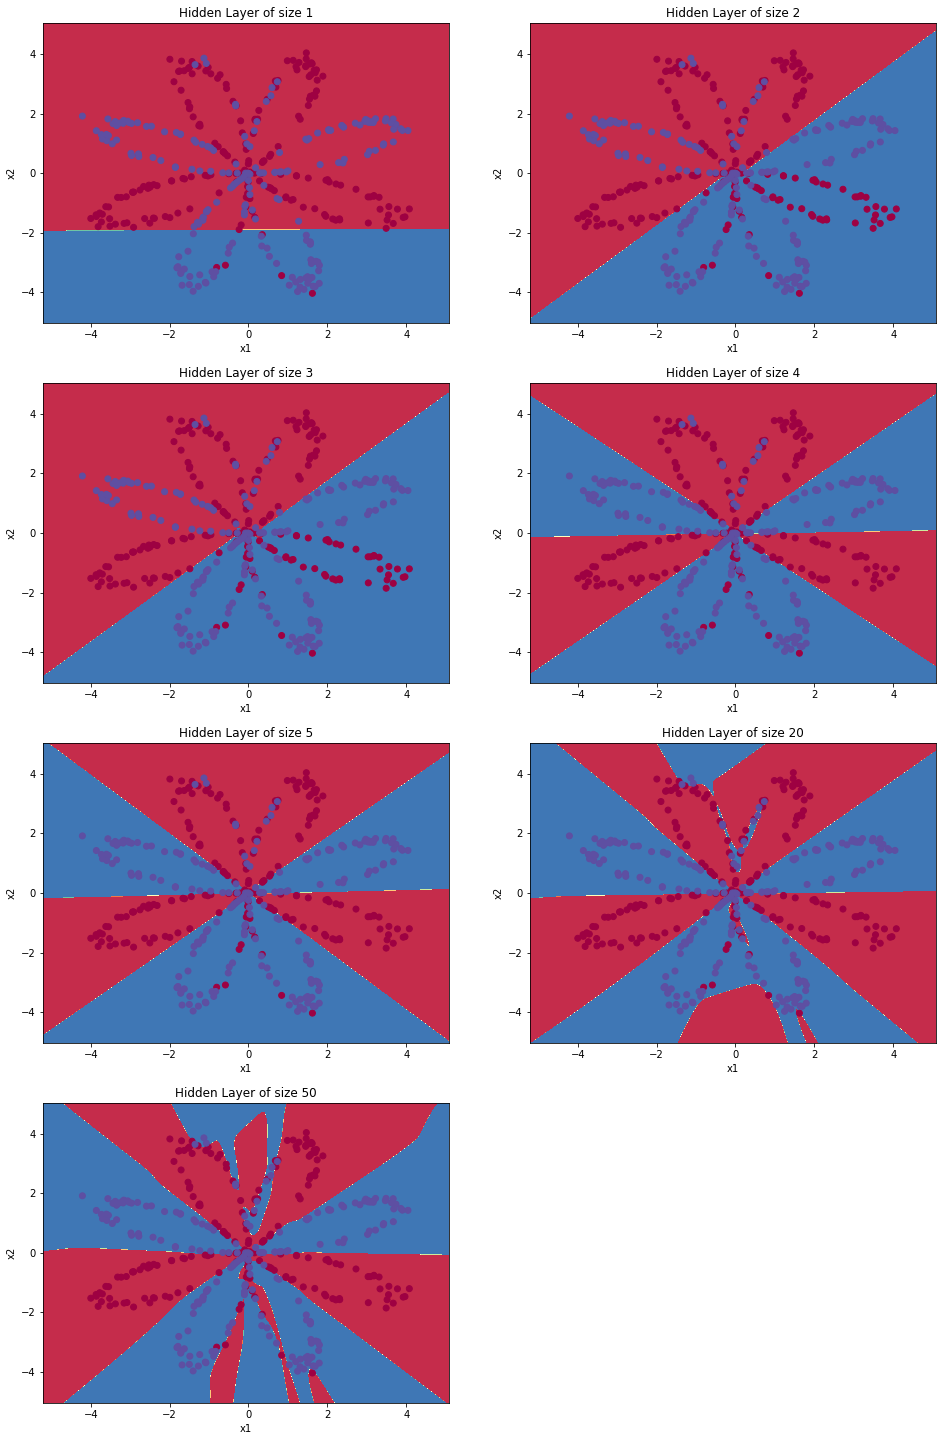

In [12]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    model = Sequential([
                    Dense(units=n_h, input_shape= [x.shape[-1]], activation=tanh),
                    Dense(units=1, activation=sigmoid)
                    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss= tf.keras.losses.BinaryCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy() )
    model.fit(x, y, epochs=1000, batch_size=400, verbose= 0)
    plot_decision_boundary(lambda x: model.predict_classes(x), x.T, y.T)
    predictions = model.predict_classes(x)
    accuracy = float((np.dot(y.T,predictions) + np.dot(1-y.T,1-predictions))/float(y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

# Ejemplo 2

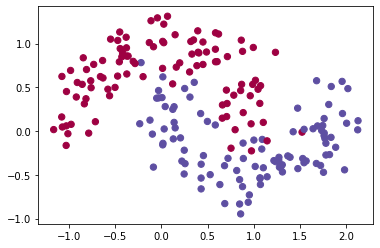

In [13]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

x, y = datasets[dataset]
#X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    y = y%2

# Visualize the data
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral);

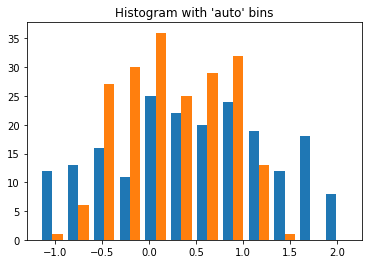

In [14]:
_ = plt.hist(x, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [15]:
# Dimensiones de los conjuntos
print ("x shape: " + str(x.shape))
print ("y shape: " + str(y.shape))

x shape: (200, 2)
y shape: (200,)


In [16]:
# Creación del modelo
model = Sequential([
                    Dense(units=1, input_shape= [x.shape[-1]], activation=tanh),
                    Dense(units=1, activation=sigmoid)
                    ])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss= tf.keras.losses.BinaryCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy() )
model.fit(x, y, epochs=1000, batch_size=200)

Epoch 1/1000
1/1 [==============================] - 0s 278ms/step - loss: 0.7245 - binary_accuracy: 0.1900
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6967 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6703 - binary_accuracy: 0.8300
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6457 - binary_accuracy: 0.8100
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6214 - binary_accuracy: 0.8200
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5971 - binary_accuracy: 0.8150
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5734 - binary_accuracy: 0.8000
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5510 - binary_accuracy: 0.8000
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5299 - binary_accuracy: 0.8100
Epoch 10/1000
1/1 [==============================] - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


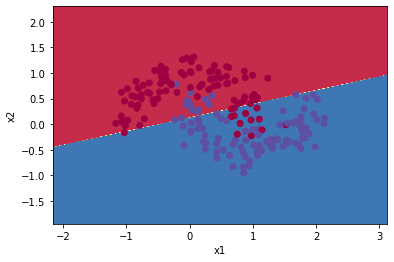

In [18]:
plot_decision_boundary(lambda x: model.predict_classes(x), x.T, y.T)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy for 1 hidden units: 86.0 %
Accuracy for 2 hidden units: 89.0 %
Accuracy for 3 hidden units: 95.5 %
Accuracy for 4 hidden units: 96.5 %
Accuracy for 5 hidden units: 97.5 %
Accuracy for 20 hidden units: 99.0 %
Accuracy for 50 hidden units: 98.5 %


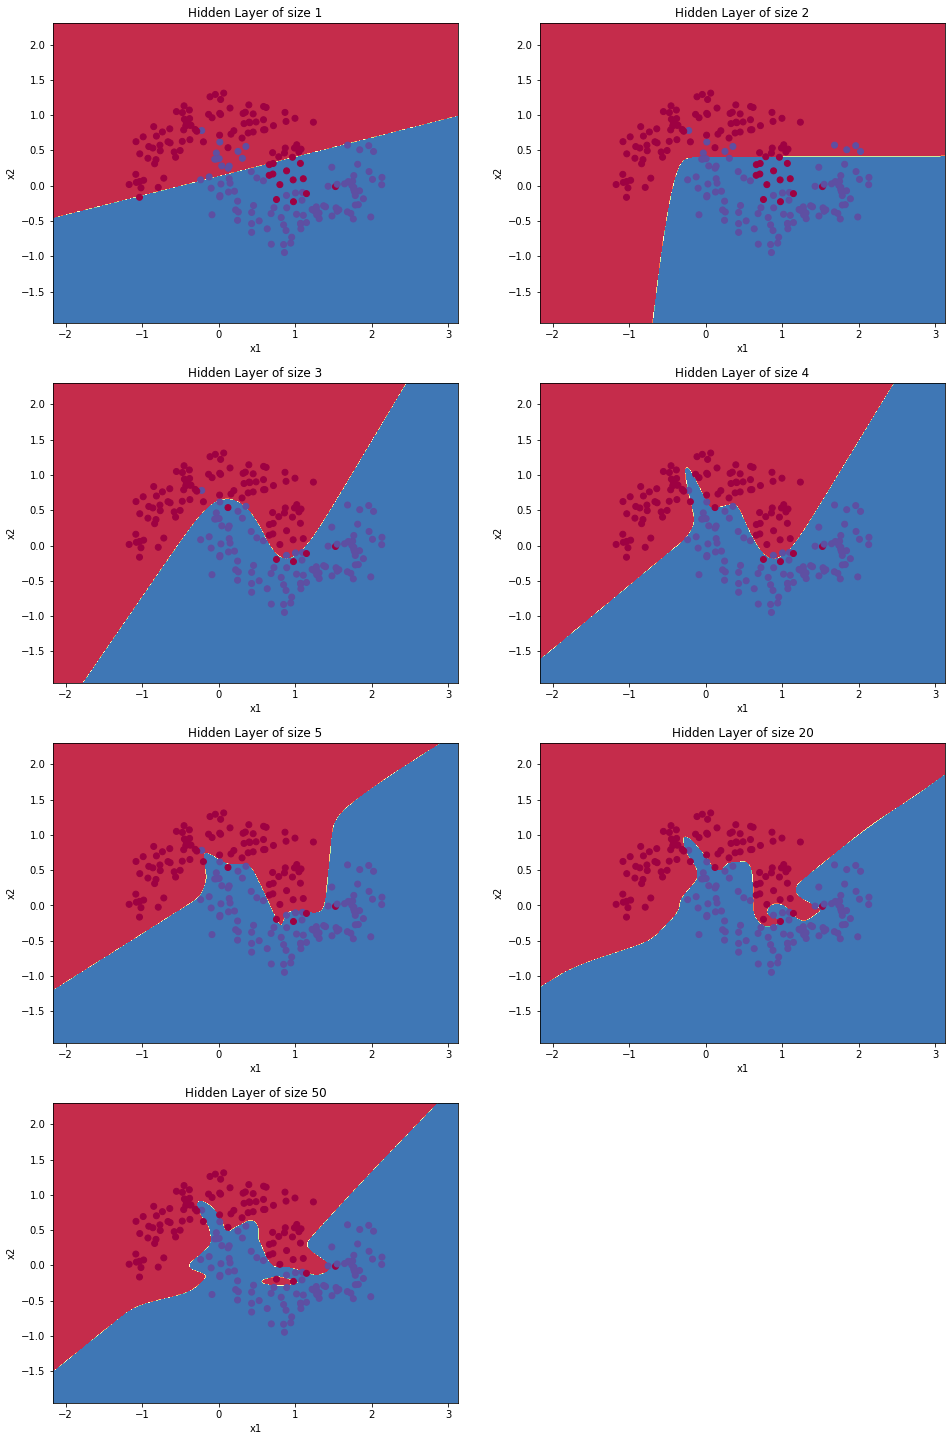

In [19]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    model = Sequential([
                    Dense(units=n_h, input_shape= [x.shape[-1]], activation=tanh),
                    Dense(units=1, activation=sigmoid)
                    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss= tf.keras.losses.BinaryCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy() )
    model.fit(x, y, epochs=1000, batch_size=400, verbose= 0)
    plot_decision_boundary(lambda x: model.predict_classes(x), x.T, y.T)
    predictions = model.predict_classes(x)
    accuracy = float((np.dot(y.T,predictions) + np.dot(1-y.T,1-predictions))/float(y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))